<a href="https://colab.research.google.com/github/SergeiNevolin/jupyter_notebooks/blob/main/%D0%9D%D0%B5%D0%B2%D0%BE%D0%BB%D0%B8%D0%BD_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B9_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_7_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика

In [ ]:
!pip install psycopg2

In [ ]:
import psycopg2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


# доступны student-ы от 0 до 30
# в этот раз важно взять своего student-а. Если в коде ниже увидите, что в вашей базе уже есть таблицы, то выберите другого пользователя.
# НЕ ЗАБУДЬТЕ ВЫПОЛНИТЬ КОД ЭТОЙ КЛЕТКИ



DB_HOST = '89.223.95.138'
DB_USER = 'student_19'
DB_USER_PASSWORD = 'student_19'
DB_NAME = 'student_19'

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)
pd.read_sql_query("""
SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema'
    """, conn)

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,adv_glossary,student_19,None,True,False,True,False
1,public,adv_events,student_19,None,False,False,True,False


### Шаг 1
Сгенерируем данные по показам, кликам, и деньгам по 5 объявлениям с названиями Advertising_0, Advertising_1, ...

Просто выполните две клетки ниже

In [ ]:
adv_sample = 'Advertising_{}'
advertisings = []
for i in range(5):
  advertisings.append(adv_sample.format(i))
advertisings

['Advertising_0',
 'Advertising_1',
 'Advertising_2',
 'Advertising_3',
 'Advertising_4']

In [ ]:
from datetime import datetime, timedelta, date
DATE_FORMAT = '%Y-%m-%d'
start_date = date(2019, 8, 1)
data = {}
for adv_id in range(1, len(advertisings)+1):
  day_data = []
  data[adv_id] = []
  for idx, events_number in enumerate(np.random.random_integers(50, 100, 30)):
    events = np.zeros(events_number)
    events[np.random.rand(events_number) > 0.5] = 1
    money = np.round(events * np.random.rand(events_number)*10 + np.random.rand(events_number), 2)
    dt = start_date + timedelta(days=idx)
    dates = [dt.strftime(DATE_FORMAT) for j in range(events_number)]
    day_data = list(zip(dates, events, money))
    data[adv_id] += day_data
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(50, 100 + 1) instead
  


{1: [('2019-08-01', 1.0, 9.23),
  ('2019-08-01', 1.0, 4.82),
  ('2019-08-01', 1.0, 1.4),
  ('2019-08-01', 0.0, 0.98),
  ('2019-08-01', 1.0, 9.82),
  ('2019-08-01', 1.0, 6.29),
  ('2019-08-01', 0.0, 0.25),
  ('2019-08-01', 1.0, 8.1),
  ('2019-08-01', 1.0, 2.24),
  ('2019-08-01', 1.0, 0.22),
  ('2019-08-01', 1.0, 4.78),
  ('2019-08-01', 0.0, 0.93),
  ('2019-08-01', 0.0, 0.89),
  ('2019-08-01', 1.0, 2.68),
  ('2019-08-01', 1.0, 4.35),
  ('2019-08-01', 1.0, 3.49),
  ('2019-08-01', 0.0, 0.41),
  ('2019-08-01', 0.0, 0.31),
  ('2019-08-01', 0.0, 0.41),
  ('2019-08-01', 0.0, 0.42),
  ('2019-08-01', 1.0, 9.28),
  ('2019-08-01', 0.0, 0.49),
  ('2019-08-01', 0.0, 0.05),
  ('2019-08-01', 0.0, 0.65),
  ('2019-08-01', 1.0, 6.33),
  ('2019-08-01', 0.0, 0.84),
  ('2019-08-01', 1.0, 5.96),
  ('2019-08-01', 1.0, 4.17),
  ('2019-08-01', 0.0, 0.64),
  ('2019-08-01', 0.0, 0.47),
  ('2019-08-01', 1.0, 6.04),
  ('2019-08-01', 0.0, 0.04),
  ('2019-08-01', 0.0, 0.92),
  ('2019-08-01', 0.0, 0.98),
  ('2019-08-0

In [ ]:
data.keys()

dict_keys([1, 2, 3, 4, 5])

Теперь в массиве advertisings у нас лежат названия объявлений, а в словаре data ключом является идентификатор объявления в нашей будущей базе данных (при использовании SERIAL PRIMARY KEY идентификаторы будут от 1 до 5 соответственно). 

Значениями в словаре data являются массивы tuple-ов в которых по порядку записана дата события, тип события, а также кол-во денег, которое стоило это событие. 

*   0 это показ
*   1 это клик (если был клик, то был и показ)
*   кол-во денег указано в рублях



In [ ]:
data[1][0][2]

9.23

### Шаг 2
Создадим структуру таблиц.
Нам понадобится создать две таблицы. В одной будут храниться названия объявлений с их уникальным идентификатором, а во второй будут храниться события, относящиеся к этим объявлениям. При этом вторая таблица связана с первой таблицей первичным ключом.

In [ ]:
# выполните, чтобы получить объект соединения
conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME) # создаём соединение

In [ ]:
# выполните эту клетку если захотите удалить ошибочно созданную таблицу adv_glossary
query = "DROP TABLE IF EXISTS adv_glossary CASCADE"

conn.cursor().execute(query) # выполняем запрос
conn.commit() # сохраняем изменения

In [ ]:
# выполните эту клетку если захотите удалить ошибочно созданную таблицу adv_events
query = "DROP TABLE IF EXISTS adv_events"


conn.cursor().execute(query) # выполняем запрос
conn.commit() # сохраняем изменения

In [ ]:
# напишите запрос для создания таблицы с объявлениями
query = """
  CREATE TABLE IF NOT EXISTS adv_glossary (
    adv_id SERIAL PRIMARY KEY,
    adv_name VARCHAR(20)
  )
""" 
conn.cursor().execute(query)
conn.commit()

In [ ]:
# напишите запрос для создания таблицы с событиями по объявлениям
query = """
  CREATE TABLE IF NOT EXISTS adv_events (
    adv_id INT,
    event_date DATE,
    event_type INT,
    event_money REAL
  )
""" 
conn.cursor().execute(query)
conn.commit()

In [ ]:
# а также добавьте ограничение целостности на идентификатор объявления
query = """
ALTER TABLE adv_events ADD FOREIGN KEY (adv_id) REFERENCES adv_glossary(adv_id)  
"""

conn.cursor().execute(query)
conn.commit()

### Шаг 3
Теперь, когда таблицы созданы, наполните их данными. Это может занять некоторое время, подождите, выпейте чаю;). Заметьте, если внешний ключ создан правильно, то база не даст вписать данные с несуществующими связями. 
С какой базы надо начать наполнение?

In [ ]:

query_template = """
INSERT INTO adv_glossary (adv_name) VALUES ('{}')
"""

cursor = conn.cursor()
for adv in advertisings:
  query = query_template.format(adv)
  print(query)
  cursor.execute(query)

conn.commit()


INSERT INTO adv_glossary (adv_name) VALUES ('Advertising_0')


INSERT INTO adv_glossary (adv_name) VALUES ('Advertising_1')


INSERT INTO adv_glossary (adv_name) VALUES ('Advertising_2')


INSERT INTO adv_glossary (adv_name) VALUES ('Advertising_3')


INSERT INTO adv_glossary (adv_name) VALUES ('Advertising_4')



In [ ]:

query_template = """
INSERT INTO adv_events (adv_id, event_date, event_type, event_money) VALUES ({}, '{}', {}, {})
"""

cursor = conn.cursor()
for id, desc in data.items():
  for i in desc:
    query = query_template.format(id, i[0], int(i[1]), i[2])
    cursor.execute(query)

conn.commit()

In [ ]:
for id, desc in data.items():
  for i in desc:
    print(id, i[0], int(i[1]), i[2])

1 2019-08-01 1 2.77
1 2019-08-01 1 9.1
1 2019-08-01 1 6.33
1 2019-08-01 0 0.15
1 2019-08-01 1 6.82
1 2019-08-01 0 0.49
1 2019-08-01 1 2.21
1 2019-08-01 0 0.4
1 2019-08-01 0 0.21
1 2019-08-01 1 2.17
1 2019-08-01 1 10.6
1 2019-08-01 1 5.84
1 2019-08-01 0 0.44
1 2019-08-01 0 0.04
1 2019-08-01 1 1.65
1 2019-08-01 1 8.81
1 2019-08-01 0 0.72
1 2019-08-01 0 0.39
1 2019-08-01 1 10.11
1 2019-08-01 0 0.87
1 2019-08-01 1 2.53
1 2019-08-01 0 0.15
1 2019-08-01 0 0.93
1 2019-08-01 0 0.38
1 2019-08-01 1 5.35
1 2019-08-01 1 8.78
1 2019-08-01 0 0.3
1 2019-08-01 0 0.88
1 2019-08-01 0 0.91
1 2019-08-01 0 0.42
1 2019-08-01 0 0.71
1 2019-08-01 0 0.91
1 2019-08-01 0 0.59
1 2019-08-01 0 0.06
1 2019-08-01 1 2.96
1 2019-08-01 0 0.59
1 2019-08-01 0 0.54
1 2019-08-01 1 5.12
1 2019-08-01 1 5.82
1 2019-08-01 1 1.74
1 2019-08-01 1 2.08
1 2019-08-01 1 3.9
1 2019-08-01 0 0.17
1 2019-08-01 0 0.91
1 2019-08-01 1 5.04
1 2019-08-01 0 0.28
1 2019-08-01 1 1.3
1 2019-08-01 0 0.69
1 2019-08-01 1 3.23
1 2019-08-01 0 0.53
1 20

KeyboardInterrupt: ignored

### Шаг 4
Проверьте, что данные действительно появились в таблицах

In [ ]:
pd.read_sql_query("select * from adv_events",conn)

,adv_id,event_date,event_type,event_money
0,1,2019-08-01,1,2.77
1,1,2019-08-01,1,9.10
2,1,2019-08-01,1,6.33
3,1,2019-08-01,0,0.15
4,1,2019-08-01,1,6.82
...,...,...,...,...
11118,5,2019-08-30,1,10.62
11119,5,2019-08-30,1,3.68
11120,5,2019-08-30,1,3.36
11121,5,2019-08-30,1,7.02


In [ ]:
pd.read_sql_query("select * from adv_glossary",conn)

,adv_id,adv_name
0,1,Advertising_0
1,2,Advertising_1
2,3,Advertising_2
3,4,Advertising_3
4,5,Advertising_4


### Шаг 5
Теперь для каждого объявления посчитайте [CTR](https://ru.wikipedia.org/wiki/CTR_(%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82)#targetText=CTR%20(%D1%81%D0%B8%D0%BD%D0%BE%D0%BD%D0%B8%D0%BC%20%E2%80%94%20%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0%D0%B1%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D1%8C%2C%20%D0%BE%D1%82,%D1%87%D0%B8%D1%81%D0%BB%D1%83%20%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%BE%D0%B2%2C%20%D0%B8%D0%B7%D0%BC%D0%B5%D1%80%D1%8F%D0%B5%D1%82%D1%81%D1%8F%20%D0%B2%20%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D0%BD%D1%82%D0%B0%D1%85.&targetText=%D0%9D%D0%B0%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%3A%20%D1%80%D0%B5%D0%BA%D0%BB%D0%B0%D0%BC%D0%BD%D1%8B%D0%B9%20%D0%B1%D0%BB%D0%BE%D0%BA%20%D0%B1%D1%8B%D0%BB%20%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD,%D0%BD%D0%B0%20%D0%BD%D0%B5%D0%B3%D0%BE%20%D0%BA%D0%BB%D0%B8%D0%BA%D0%BD%D1%83%D0%BB%D0%B8%202%20%D1%80%D0%B0%D0%B7%D0%B0.) и [CPM](http://promo-sa.ru/seo-terms/cpm) за каждый день с помощью sql запроса, и выведите результат в pandas.

В результирующем датафрейме должно быть отражено название объявления, дата, CTR за день, CPM за день.

In [ ]:
# data = pd.read_sql_query("", conn) # считаем данные в переменную
# Всё сводится к тому ,чтобы посчитать кол-во кликов и кол-во показов. 
data = pd.read_sql_query("""
SELECT adv_name,
       a.event_date,
       (CAST(click AS REAL)/(click + show)*100) AS CTR,
       ((click_money + show_money)/(click + show))*1000 AS CPM
FROM 
(SELECT adv_id,
       event_date,
       COUNT(event_type) AS click,
       SUM(event_money) AS click_money
FROM adv_events
WHERE event_type = 1
GROUP BY (adv_id,
          event_date)) AS a
INNER JOIN 
(SELECT adv_id,
       event_date,
       COUNT(event_type) AS show,
       SUM(event_money) AS show_money
FROM adv_events
WHERE event_type = 0
GROUP BY (adv_id,
          event_date)) AS b
ON a.adv_id = b.adv_id AND a.event_date=b.event_date
INNER JOIN adv_glossary 
ON a.adv_id = adv_glossary.adv_id
ORDER BY a.adv_id 
    """, conn)

In [ ]:
data

,adv_name,event_date,ctr,cpm
0,Advertising_0,2019-08-14,51.562500,3073.281050
1,Advertising_0,2019-08-08,57.575758,3265.151515
2,Advertising_0,2019-08-18,56.363636,3298.363148
3,Advertising_0,2019-08-20,47.368421,2584.561264
4,Advertising_0,2019-08-15,56.603774,2944.150817
...,...,...,...,...
145,Advertising_4,2019-08-25,43.750000,2657.812834
146,Advertising_4,2019-08-18,48.214286,2631.964275
147,Advertising_4,2019-08-02,53.061224,2942.142720
148,Advertising_4,2019-08-05,41.666667,2942.833964


### Шаг 6
Но на таблицу не так интересно смотреть как на графики...

Для каждого объявления постройте дневные графики CTR и CPM.

На всякий случай проследите, чтобы данные были нарисованы по возрастанию даты. Для этого надо либо отсортировать датафрейм по дате, либо проследить, что тип данных у это поля в pandas что-то типа date. Чтобы посмотреть типы полей в pandas используйте атрибут датафрейма .dtypes

In [ ]:

data.dtypes

adv_name       object
event_date     object
ctr           float64
cpm           float64
dtype: object

In [ ]:
data = data.astype({'event_date': np.datetime64})

In [ ]:
groups = data.groupby(['adv_name'])

In [ ]:
groups.apply(lambda x: x.sort_values('event_date'))

adv_name event_date        ctr          cpm
adv_name                                                           
Advertising_0 28   Advertising_0 2019-08-01  50.549451  2565.274584
              24   Advertising_0 2019-08-02  46.428571  3162.857056
              23   Advertising_0 2019-08-03  53.030303  3207.423817
              22   Advertising_0 2019-08-04  48.235294  2449.411908
              6    Advertising_0 2019-08-05  40.000000  2470.181552
...                          ...        ...        ...          ...
Advertising_4 140  Advertising_4 2019-08-26  51.515152  2808.888753
              137  Advertising_4 2019-08-27  52.054795  3320.958804
              139  Advertising_4 2019-08-28  51.190476  2784.523919
              144  Advertising_4 2019-08-29  52.000000  3201.599731
              142  Advertising_4 2019-08-30  45.762712  2675.254175

[150 rows x 4 columns]

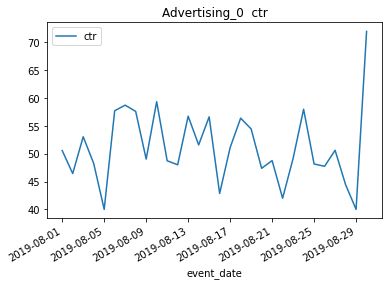

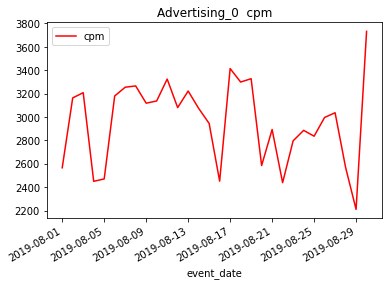

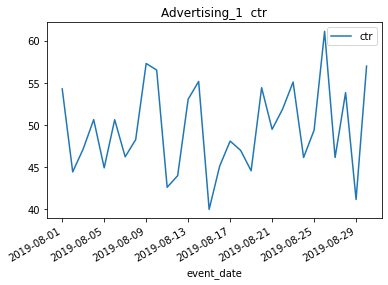

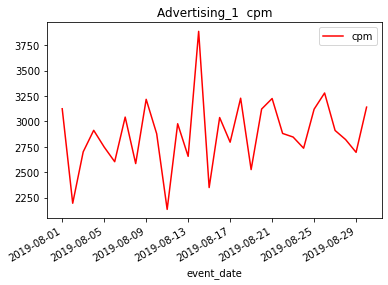

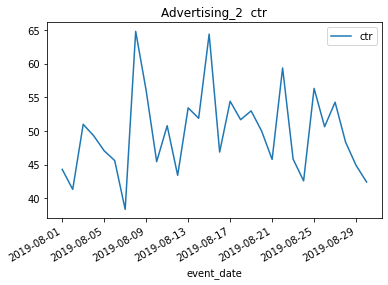

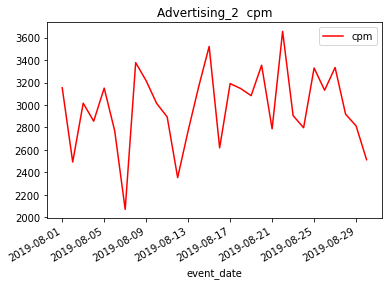

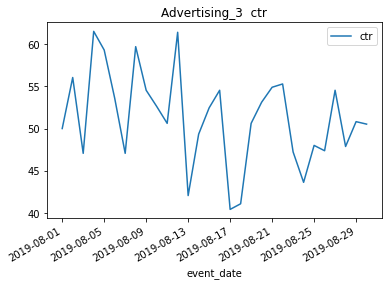

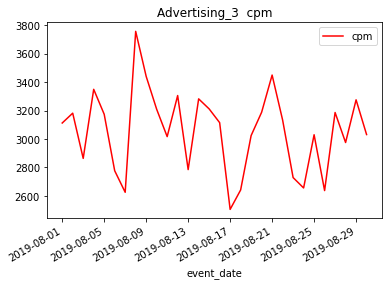

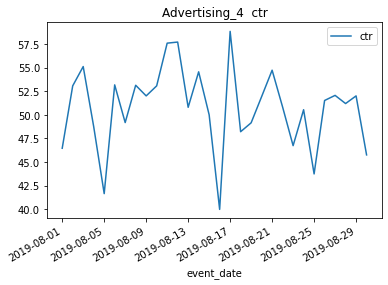

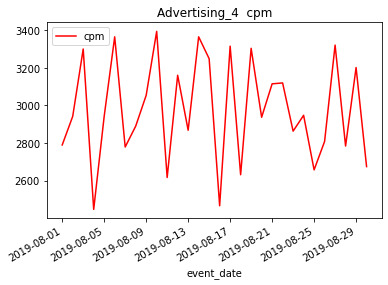

In [ ]:

for (key, ax) in zip(groups.groups.keys(), axes.flatten()):
    groups.get_group(key).plot(x = 'event_date', y = 'ctr')
    plt.title(key + '  ctr')
    groups.get_group(key).plot(x = 'event_date', y = 'cpm', c='r')
    plt.title(key + '  cpm')

plt.show()